# --------------------------------------- Workshop #4 -------------------------------------


* This workshop includes marked tasks that comprise 15% of your final mark in this module.

* You need to read the examples in Lecture #4 and Lecture #4 exercise to complete the tasks.

# Tasks

## TASK 4.1:  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods (10%).

## NOTE: You should comment on your code wherever necessary and briefly explain what the code is doing

In [1]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################

import pandas as pd
import numpy as np

In [3]:
# Replace the data path with the data path on your local disk
df = pd.read_csv('adult_WS4.csv')

In [4]:
#display the dataset

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9996,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9997,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9998,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [5]:
#view the columns with null values

df.isna().sum()

age                 0
workclass         175
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        175
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country     61
income              0
dtype: int64

In [6]:
#drop the null values
df.dropna(inplace=True)

#reindexing the dataset
df.reset_index(drop=True, inplace=True)

In [7]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9761,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9762,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9763,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [8]:
#view the columns

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
#select the 3 optional columns which will be age, education-num and hours-per-week

selected_columns = df.iloc[:,[0,4,-3]].values
print(selected_columns)

[[29 14 40]
 [36 10 45]
 [25 13 25]
 ...
 [30  9 40]
 [41 11 40]
 [21 10 40]]


In [10]:
#move on to normalize the selected columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(selected_columns)

In [11]:
#display the columns after being scaled

print(X)

[[-0.70692602  1.53016812 -0.04922015]
 [-0.19183826 -0.03134214  0.36017915]
 [-1.00126188  1.13979056 -1.27741806]
 ...
 [-0.63334205 -0.42171971 -0.04922015]
 [ 0.17608157  0.35903542 -0.04922015]
 [-1.29559775 -0.03134214 -0.04922015]]


In [12]:
#import the kmeans clutering

from sklearn.cluster import KMeans

#import the libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
wcss=[] #list to hold all wcss

def get_optimum(wcss):
    #Choosing the best number of clusters using WCSS- Within Clusters Sum of Squares

    #loop through 10 possible clusters
    for i in range(1,6):
        # create an instance
        kmeans=KMeans(n_clusters = i, init='k-means++',random_state=3)
        kmeans.fit(X)

        #append the wcss values
        wcss.append(kmeans.inertia_)

> The above function loops through a number of possible clusters in search of the optimal one with the use of the wcss score. Each wccs score is stored in a wcss list, which will now be plotted in subsequent cell to clearly display the optimum number of cluster

In [14]:
#Call the function by passing the list to it
get_optimum(wcss)

print("The wcss values are : \n",wcss) # Display the wcss values

The wcss values are : 
 [29294.99999999988, 22260.1938686675, 17038.63563481063, 14374.913018522604, 12163.873763054165]


## Plot the wccs

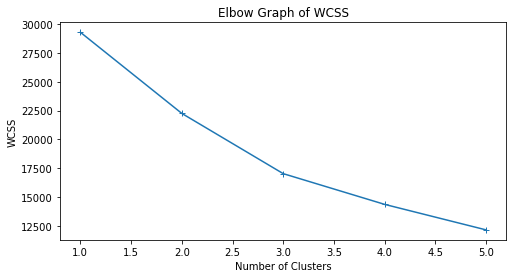

In [15]:
#set fig size
plt.figure(figsize=(8,4))

#set plot to range from 1 to 6 with a marker
plt.plot(range(1,6), wcss,marker = '+')

#set plot title
plt.title("Elbow Graph of WCSS")

#set label for the horizontal
plt.xlabel("Number of Clusters")

#set the vertical label
plt.ylabel("WCSS")

#dislay te generated plot
plt.show()

> From the plot it is evident that the optimum no. of cluster is 3, #Hence we make use of 3 clusters in training the Kmeans model

In [16]:
#Training the k_means model by specifying 6 as the number of clusters
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=5)

# returning the labels of each clusters formed
y = kmeans.fit_predict(X)

print(y) # Display the labels

[0 2 2 ... 2 0 2]


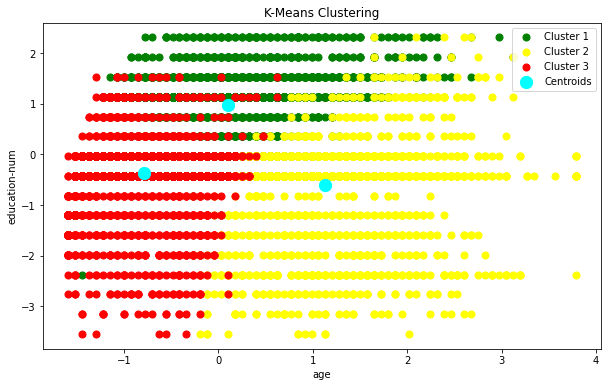

In [17]:
#Visualizing the clusters

plt.figure(figsize=(10,6))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c="green",label="Cluster 1")
plt.scatter(X[y==1,0],X[y==1,1],s=50,c="yellow",label="Cluster 2")
plt.scatter(X[y==2,0],X[y==2,1],s=50,c="red",label="Cluster 3")

#Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=150,c='cyan',label='Centroids')

#Labels
plt.xlabel("age")
plt.ylabel("education-num")
plt.title("K-Means Clustering")
plt.legend(loc='upper right')
plt.show()

# Agglomerative Hierarchical clustering

In [20]:
#import the sillhouette metrics
from sklearn.metrics import silhouette_score

#import agglomerative cluster method for Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

In [22]:
#container to hold generated silhouette scores
silhouette_scores = []

# Loop through possible numbers of clusters
for i in range(2, 7):
    # Create an instance of AgglomerativeClustering
    hierarchical_clustering = AgglomerativeClustering(n_clusters=i)
    labels = hierarchical_clustering.fit_predict(X)

    # Calculate silhouette score and append to list
    silhouette_scores.append(silhouette_score(X, labels))

In [23]:
# Find the number of clusters with the highest silhouette score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because range starts from 2
print("Optimal Number of Clusters:", optimal_clusters)

Optimal Number of Clusters: 6


> After looping through possible clusters from 2 to 7, it is found out that 6 is the optimum number of cluster

In [24]:
hierarchical = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
y = hierarchical.fit_predict(X)

In [25]:
y

array([1, 5, 4, ..., 5, 1, 5], dtype=int64)

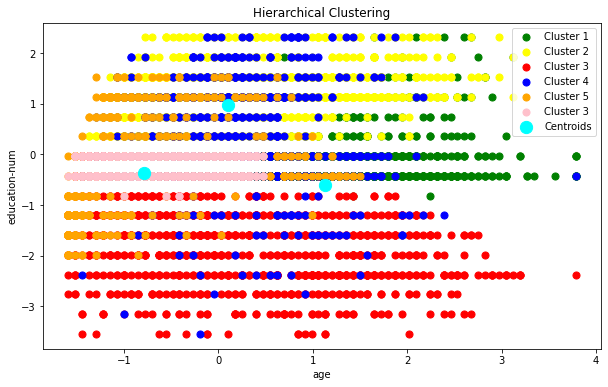

In [27]:
#Visualizing the clusters

#set the fig size
plt.figure(figsize=(10,6))

#plot each label
plt.scatter(X[y==0,0],X[y==0,1],s=50,c="green",label="Cluster 1")
plt.scatter(X[y==1,0],X[y==1,1],s=50,c="yellow",label="Cluster 2")
plt.scatter(X[y==2,0],X[y==2,1],s=50,c="red",label="Cluster 3")
plt.scatter(X[y==3,0],X[y==3,1],s=50,c="blue",label="Cluster 4")
plt.scatter(X[y==4,0],X[y==4,1],s=50,c="orange",label="Cluster 5")
plt.scatter(X[y==5,0],X[y==5,1],s=50,c="pink",label="Cluster 3")

#Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=150,c='cyan',label='Centroids')

#Labels
plt.xlabel("age")
plt.ylabel("education-num")
plt.legend(loc='upper right')
plt.title("Hierarchical Clustering")

#display the generated plot
plt.show()

## Task 4.2: Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column (5%).

## NOTE 1: You should comment on your code wherever necessary and briefly explain what the code is doing.

## NOTE 2: You need to encode the categorical columns, normalise the dataset, and remove the income column before applying the PCA method.

## HINT: See the examples in the last three slides in Lecture #4 or the Lecture #4 exercise notebook

In [28]:
#import PCA from sklearn
from sklearn.decomposition import PCA

In [29]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,<=50K
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,<=50K
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States,>50K
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,<=50K
9761,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
9762,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9763,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States,>50K


In [30]:
# Separate features (X) and target variable (y)
X = df.iloc[:,:-1]
y = df['income']

In [31]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,29,Private,216481,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
1,36,Private,280570,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States
2,25,?,100903,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States
3,47,Private,145636,Assoc-voc,11,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,48,United-States
4,33,Private,119422,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,19,Private,63363,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States
9761,53,Private,58535,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States
9762,30,Private,342709,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
9763,41,Self-emp-not-inc,134724,Assoc-voc,11,Married-civ-spouse,Other-service,Wife,White,Female,3103,0,40,United-States


In [32]:
# import ordinal encoder for encoding nominal and ordinal columns
from sklearn.preprocessing import OrdinalEncoder

#create an instance
ordinal_encoder = OrdinalEncoder()

In [33]:
#selecting the nominal and ordinal columns

nom_ord_col = ['workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

#store the result in a dataframe
X_encoded = pd.DataFrame(ordinal_encoder.fit_transform(X[nom_ord_col]))

#display the result
X_encoded

,0,1,2,3,4,5,6,7,8
0,4.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,38.0
1,4.0,15.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,0.0,9.0,12.0,2.0,0.0,5.0,4.0,0.0,38.0
3,4.0,8.0,10.0,2.0,6.0,0.0,4.0,1.0,38.0
4,4.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...
9760,4.0,15.0,9.0,4.0,12.0,3.0,4.0,0.0,38.0
9761,4.0,11.0,8.0,0.0,12.0,1.0,4.0,0.0,38.0
9762,4.0,11.0,8.0,2.0,6.0,0.0,4.0,1.0,38.0
9763,6.0,8.0,10.0,2.0,8.0,5.0,4.0,0.0,38.0


In [34]:
#get the numerical columns
num_feat = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

#normalising the input data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X[num_feat]))
X_norm

,0,1,2,3,4
0,0.164384,0.150828,0.00000,0.0,0.397959
1,0.260274,0.198167,0.00000,0.0,0.448980
2,0.109589,0.065457,0.00000,0.0,0.244898
3,0.410959,0.098499,0.00000,0.0,0.479592
4,0.219178,0.079136,0.00000,0.0,0.397959
...,...,...,...,...,...
9760,0.027397,0.037728,0.00000,0.0,0.295918
9761,0.493151,0.034162,0.00000,0.0,0.397959
9762,0.178082,0.244065,0.00000,0.0,0.397959
9763,0.328767,0.090439,0.03103,0.0,0.397959


In [35]:
#concat the dataset
X_concatenated = pd.concat([X_norm, X_encoded], axis=1)

X_concatenated

,0,1,2,3,4,0,1,2,3,4,5,6,7,8
0,0.164384,0.150828,0.00000,0.0,0.397959,4.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,38.0
1,0.260274,0.198167,0.00000,0.0,0.448980,4.0,15.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,0.109589,0.065457,0.00000,0.0,0.244898,0.0,9.0,12.0,2.0,0.0,5.0,4.0,0.0,38.0
3,0.410959,0.098499,0.00000,0.0,0.479592,4.0,8.0,10.0,2.0,6.0,0.0,4.0,1.0,38.0
4,0.219178,0.079136,0.00000,0.0,0.397959,4.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,0.027397,0.037728,0.00000,0.0,0.295918,4.0,15.0,9.0,4.0,12.0,3.0,4.0,0.0,38.0
9761,0.493151,0.034162,0.00000,0.0,0.397959,4.0,11.0,8.0,0.0,12.0,1.0,4.0,0.0,38.0
9762,0.178082,0.244065,0.00000,0.0,0.397959,4.0,11.0,8.0,2.0,6.0,0.0,4.0,1.0,38.0
9763,0.328767,0.090439,0.03103,0.0,0.397959,6.0,8.0,10.0,2.0,8.0,5.0,4.0,0.0,38.0


In [36]:
#new columns
edit_col = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

#rename the columns
X_concatenated.columns = edit_col

#display the result
X_concatenated

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,0.164384,0.150828,0.00000,0.0,0.397959,4.0,12.0,13.0,2.0,4.0,5.0,4.0,0.0,38.0
1,0.260274,0.198167,0.00000,0.0,0.448980,4.0,15.0,9.0,2.0,3.0,0.0,4.0,1.0,38.0
2,0.109589,0.065457,0.00000,0.0,0.244898,0.0,9.0,12.0,2.0,0.0,5.0,4.0,0.0,38.0
3,0.410959,0.098499,0.00000,0.0,0.479592,4.0,8.0,10.0,2.0,6.0,0.0,4.0,1.0,38.0
4,0.219178,0.079136,0.00000,0.0,0.397959,4.0,11.0,8.0,2.0,4.0,0.0,4.0,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9760,0.027397,0.037728,0.00000,0.0,0.295918,4.0,15.0,9.0,4.0,12.0,3.0,4.0,0.0,38.0
9761,0.493151,0.034162,0.00000,0.0,0.397959,4.0,11.0,8.0,0.0,12.0,1.0,4.0,0.0,38.0
9762,0.178082,0.244065,0.00000,0.0,0.397959,4.0,11.0,8.0,2.0,6.0,0.0,4.0,1.0,38.0
9763,0.328767,0.090439,0.03103,0.0,0.397959,6.0,8.0,10.0,2.0,8.0,5.0,4.0,0.0,38.0


In [37]:
X = X_concatenated

In [38]:
#encoding the output data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

#display y
y

array([1, 0, 0, ..., 0, 1, 0])

In [39]:
# Apply PCA with n_components=2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

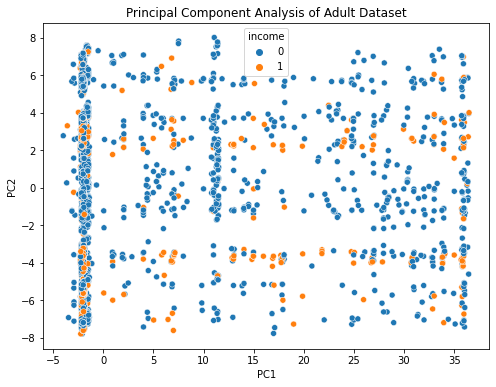

In [40]:
# Create a DataFrame with the first two principal components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate the principal components with the target variable
df_pca['income'] = y

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='income', data=df_pca)
plt.title('Principal Component Analysis of Adult Dataset')
plt.show()


In [41]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################



